In [32]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import datetime as dt 


In [33]:
end = dt.datetime.now()
start = dt.date(end.year - 1,end.month,end.day)
portfolio = ['GOOG','AAPL','MSFT','TSLA','^GSPC']

In [34]:
df = yf.download(portfolio,start=start,end=end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [4]:
df.head()

,AAPL,GOOG,MSFT,TSLA,^GSPC
Date,,,,,
2021-12-27,179.289459,148.063995,339.270996,364.646667,4791.189941
2021-12-28,178.255432,146.447998,338.082123,362.823334,4786.350098
2021-12-29,178.344925,146.504501,338.775635,362.063324,4793.060059
2021-12-30,177.171738,146.002502,336.170044,356.779999,4778.729980
2021-12-31,176.545380,144.679504,333.197906,352.260010,4766.180176


In [5]:
returns = df.pct_change()

In [6]:
returns.cov()

,AAPL,GOOG,MSFT,TSLA,^GSPC
AAPL,0.000498,0.000427,0.000407,0.000590,0.000300
GOOG,0.000427,0.000591,0.000455,0.000545,0.000307
MSFT,0.000407,0.000455,0.000491,0.000503,0.000295
TSLA,0.000590,0.000545,0.000503,0.001681,0.000401
^GSPC,0.000300,0.000307,0.000295,0.000401,0.000230


In [7]:
returns.var()

AAPL     0.000498
GOOG     0.000591
MSFT     0.000491
TSLA     0.001681
^GSPC    0.000230
dtype: float64

In [8]:
returns.corr()

,AAPL,GOOG,MSFT,TSLA,^GSPC
AAPL,1.000000,0.787668,0.821873,0.644988,0.885376
GOOG,0.787668,1.000000,0.844194,0.546393,0.833349
MSFT,0.821873,0.844194,1.000000,0.553243,0.877386
TSLA,0.644988,0.546393,0.553243,1.000000,0.644131
^GSPC,0.885376,0.833349,0.877386,0.644131,1.000000


<AxesSubplot:>

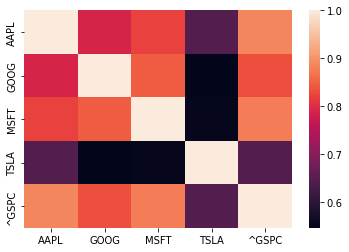

In [9]:
import seaborn as sns
sns.heatmap(returns.corr())

In [42]:
import requests

headers = {
    'authority': 'api.nasdaq.com',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'tr-TR,tr;q=0.9,en-US;q=0.8,en;q=0.7',
    'origin': 'https://www.nasdaq.com',
    'referer': 'https://www.nasdaq.com/',
    'sec-ch-ua': '"Not?A_Brand";v="8", "Chromium";v="108", "Google Chrome";v="108"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
}

response = requests.get(
    'https://api.nasdaq.com/api/screener/stocks?tableonly=true&limit=50&marketcap=mega|large',
    headers=headers,
)

In [43]:
import pandas as pd

In [44]:
a = response.json()

In [45]:
symbols = list()
for elem in a['data']['table']['rows']:
    symbols.append(elem['symbol'])

In [46]:
end = dt.datetime.now()
start = dt.date(end.year - 1,end.month,end.day)
portfolio = symbols

In [47]:
df = yf.download(portfolio,start=start,end=end)['Adj Close']

[*********************100%***********************]  50 of 50 completed

2 Failed downloads:
- BRK/A: No timezone found, symbol may be delisted
- BRK/B: No timezone found, symbol may be delisted


In [48]:
returns = df.pct_change()

In [49]:
returns.corr()

,AAPL,ABBV,ABT,ACN,AMZN,ASML,AVGO,AZN,BABA,BAC,...,TM,TMO,TMUS,TSLA,TSM,UNH,V,VZ,WMT,XOM
AAPL,1.000000,0.236340,0.619642,0.787457,0.694927,0.757027,0.759615,0.415188,0.399443,0.571850,...,0.604821,0.628047,0.515950,0.644989,0.649571,0.485393,0.703733,0.366145,0.337285,0.276005
ABBV,0.236340,1.000000,0.460829,0.338883,0.211902,0.205371,0.260660,0.422530,0.051123,0.296534,...,0.204101,0.362473,0.302195,0.063268,0.126526,0.508163,0.300026,0.296832,0.244132,0.177651
ABT,0.619642,0.460829,1.000000,0.700043,0.511475,0.561003,0.578578,0.477938,0.274310,0.569563,...,0.469633,0.728033,0.474655,0.364818,0.402358,0.554633,0.621079,0.429348,0.282254,0.166335
ACN,0.787457,0.338883,0.700043,1.000000,0.688183,0.746100,0.750512,0.467113,0.333923,0.569927,...,0.551285,0.698734,0.508031,0.517578,0.562732,0.517233,0.680778,0.345468,0.354861,0.251224
AMZN,0.694927,0.211902,0.511475,0.688183,1.000000,0.673573,0.658855,0.303381,0.329543,0.551289,...,0.470495,0.548367,0.404544,0.589477,0.544214,0.320625,0.550799,0.217261,0.302092,0.249057
ASML,0.757027,0.205371,0.561003,0.746100,0.673573,1.000000,0.799433,0.412845,0.440636,0.576901,...,0.591416,0.643857,0.406262,0.587558,0.751833,0.359031,0.663049,0.195326,0.245512,0.272259
AVGO,0.759615,0.260660,0.578578,0.750512,0.658855,0.799433,1.000000,0.363022,0.377295,0.556177,...,0.560137,0.619500,0.429494,0.600424,0.697903,0.408041,0.607955,0.228016,0.216753,0.269450
AZN,0.415188,0.422530,0.477938,0.467113,0.303381,0.412845,0.363022,1.000000,0.240685,0.382484,...,0.400289,0.441764,0.299082,0.231724,0.310568,0.488873,0.455379,0.323941,0.139220,0.176513
BABA,0.399443,0.051123,0.274310,0.333923,0.329543,0.440636,0.377295,0.240685,1.000000,0.304537,...,0.331100,0.296719,0.176652,0.432188,0.427228,0.112157,0.379537,0.045730,0.053761,0.112459
BAC,0.571850,0.296534,0.569563,0.569927,0.551289,0.576901,0.556177,0.382484,0.304537,1.000000,...,0.588225,0.465985,0.371684,0.416896,0.538192,0.424209,0.589799,0.351647,0.232317,0.315390


<AxesSubplot:>

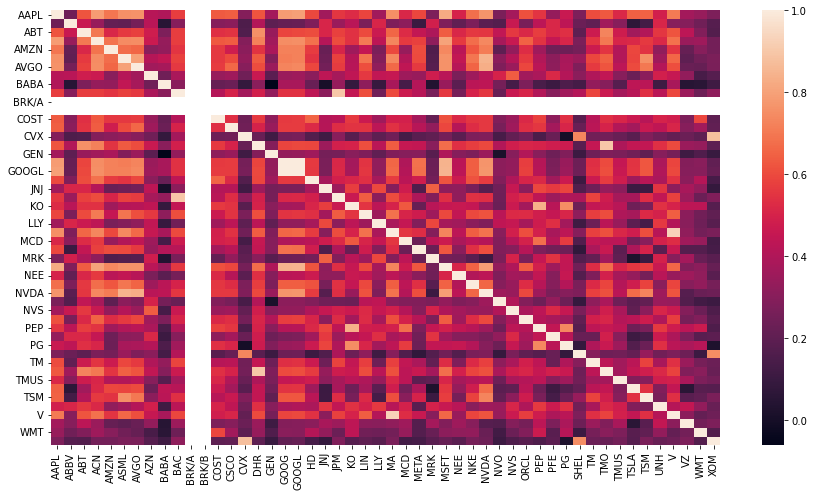

In [50]:
import seaborn as sns
sns.heatmap(returns.corr())

In [51]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8


<AxesSubplot:>

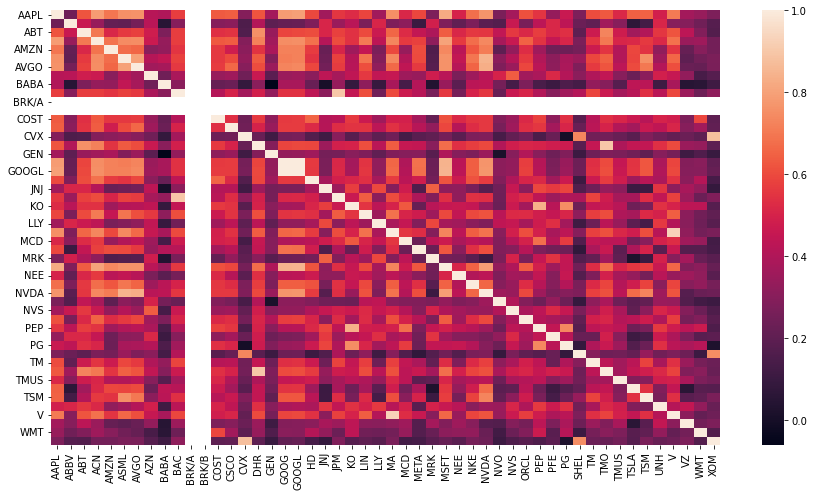

In [52]:
sns.heatmap(returns.corr())